In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf



2024-01-05 06:47:18.704398: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 06:47:18.704434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 06:47:18.705396: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 06:47:18.711217: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:


# Load data
file_path = './NOVFinalDataSetV1.xlsx'
data = pd.read_excel(file_path)
data.columns.to_list()

['No. ',
 'Crash_Time_Cat',
 'Week Day',
 'Crash Type',
 'Causes of Crash',
 'Accident Severity Level',
 'Direction',
 'Geometrical Condition Type',
 'Road Surface Conditions',
 'Weather Condition',
 'Light Condition',
 'Vehicle_Type_Cat',
 'Maufactured_Year_Cat',
 'Vehicle Ownership',
 'Driver_Age_Cat',
 'Sex',
 'Marital Status',
 'License Level',
 'Driving License Issuing Region',
 'Driver_Exp_Cat',
 'Driver Education Level',
 'Driver Relationship with Vehicle']

In [3]:
from sklearn.impute import SimpleImputer
object_columns = data.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
data[object_columns] = imputer.fit_transform(data[object_columns])




In [4]:
dropped_columns = ['Crash_Time_Cat','Marital Status','No. ']
data = data.drop(dropped_columns,axis=1)

In [5]:

for column in data.columns:
  if data[column].dtype == 'object':
    data[column] = data[column].str.strip()
    data[column] = data[column].str.upper()
{column: len(data[column].unique()) for column in data.columns}


{'Week Day': 7,
 'Crash Type': 4,
 'Causes of Crash': 3,
 'Accident Severity Level': 4,
 'Direction': 4,
 'Geometrical Condition Type': 4,
 'Road Surface Conditions': 2,
 'Weather Condition': 4,
 'Light Condition': 2,
 'Vehicle_Type_Cat': 15,
 'Maufactured_Year_Cat': 5,
 'Vehicle Ownership': 8,
 'Driver_Age_Cat': 4,
 'Sex': 2,
 'License Level': 24,
 'Driving License Issuing Region': 15,
 'Driver_Exp_Cat': 4,
 'Driver Education Level': 6,
 'Driver Relationship with Vehicle': 4}

In [6]:
data['Vehicle_Type_Cat'] = data['Vehicle_Type_Cat'].str.replace('!','1')
data['Vehicle_Type_Cat'] = data['Vehicle_Type_Cat'].str.replace('-','')
data['Vehicle_Type_Cat'].unique()

array(['V1', 'V3', 'V4', 'V5', 'V2', 'V7', 'V6'], dtype=object)

In [7]:
data['License Level'] = data['License Level'].str.replace('HIZEBE 1','HIZBE 1')
data['License Level'] = data['License Level'].str.replace('HIZEBE 2','HIZBE 2')
data['License Level'] = data['License Level'].str.replace('D/CHENET 1','D/CHENET')


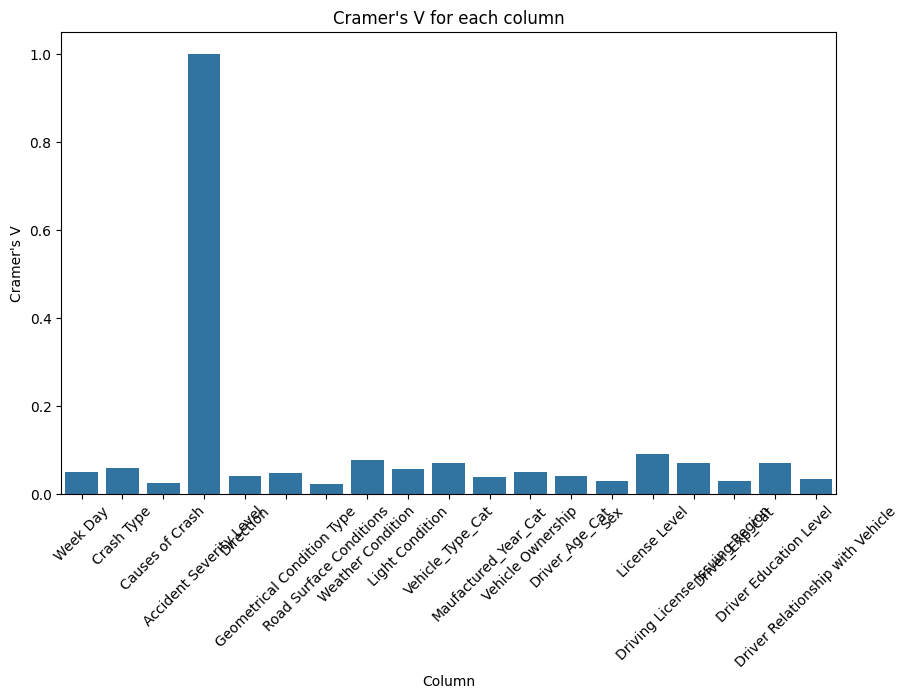

Columns to drop: ['License Level', 'Weather Condition', 'Vehicle_Type_Cat', 'Driving License Issuing Region', 'Driver Education Level', 'Crash Type', 'Light Condition', 'Week Day', 'Vehicle Ownership', 'Geometrical Condition Type', 'Direction', 'Driver_Age_Cat', 'Maufactured_Year_Cat', 'Driver Relationship with Vehicle', 'Sex', 'Driver_Exp_Cat', 'Causes of Crash', 'Road Surface Conditions']


In [8]:
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
# Calculate Cramer's V for each column
cramer_v = {}
for column in data.columns:
  contingency_table = pd.crosstab(data[column], data['Accident Severity Level'])
  chi2, _, _, _ = chi2_contingency(contingency_table)
  n = contingency_table.sum().sum()
  cramer_v[column] = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Sort the columns by Cramer's V value in descending order
sorted_columns = sorted(cramer_v, key=cramer_v.get, reverse=True)

# Plot the Cramer's V values
plt.figure(figsize=(10, 6))
sns.barplot(x=list(cramer_v.keys()), y=list(cramer_v.values()))
plt.xlabel('Column')
plt.ylabel("Cramer's V")
plt.title("Cramer's V for each column")
plt.xticks(rotation=45)
plt.show()

# Print out the columns to drop
columns_to_drop = sorted_columns[1:]  # Exclude the first column (Accident Severity Level)
print("Columns to drop:", columns_to_drop)


In [9]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import chi2_contingency
# import numpy as np

# # Cramér's V Matrix (for categorical features)
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x, y)
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2 / n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
#     rcorr = r - ((r-1)**2)/(n-1)
#     kcorr = k - ((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# # Calculating Cramér's V matrix
# categorical_data = data.select_dtypes(include=['object'])
# cramers_matrix = pd.DataFrame(index=categorical_data.columns, columns=categorical_data.columns)

# for col1 in categorical_data.columns:
#     for col2 in categorical_data.columns:
#         cramers_matrix.loc[col1, col2] = cramers_v(categorical_data[col1], categorical_data[col2])

# # Create a mask to hide the upper triangle of the heatmap
# print(cramers_matrix)


In [10]:
# columns_to_map = [column for column in data.columns if column != 'Accident Severity Level']

# for column in columns_to_map:
#   labels = data[column].value_counts().index[::-1]
#   label_to_index = {label: index for index, label in enumerate(labels)}
#   data[column] = data[column].map(label_to_index)


In [11]:
def map_accident_level(value):
    value = value.upper()
    if value == 'NO INJURY':
        return 0
    elif value == 'LIGHT INJURY':
        return 1
    elif value == 'SERIOUS INJURY':
        return 2
    else:
        return 3

def get_accident_level(df, column):
    if column == 'Accident Severity Level':
        return df[column].apply(map_accident_level)


/tmp/ipykernel_39742/831984368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident Severity Level', data=data, palette="coolwarm")


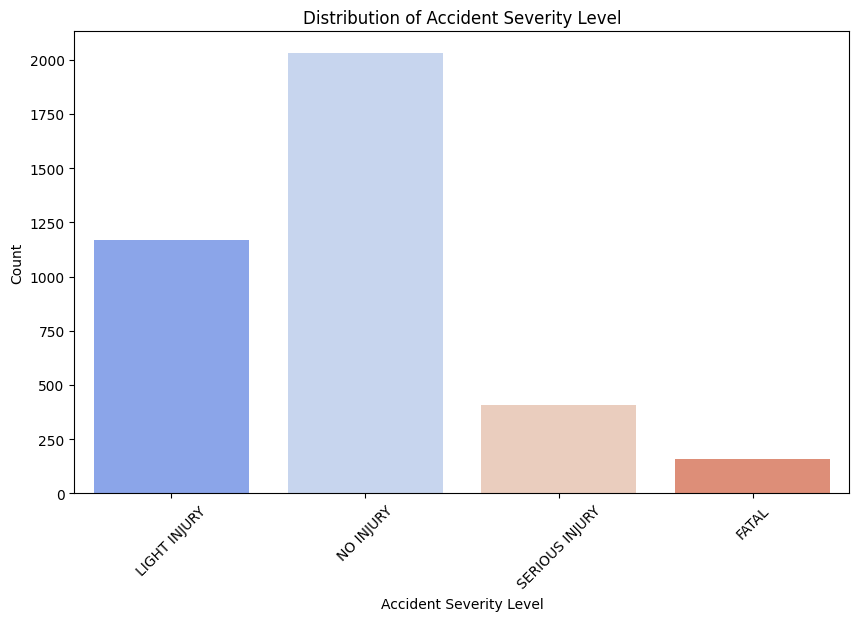

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Accident Severity Level', data=data, palette="coolwarm")
plt.title('Distribution of Accident Severity Level')
plt.xlabel('Accident Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
# data['Accident Severity Level'] = get_accident_level(data, 'Accident Severity Level')

/tmp/ipykernel_39742/831984368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident Severity Level', data=data, palette="coolwarm")


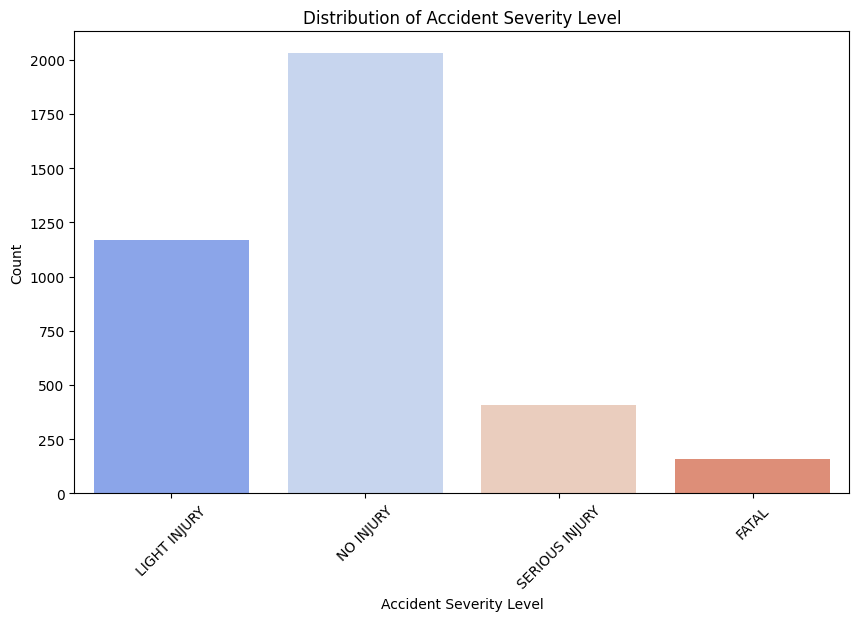

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Accident Severity Level', data=data, palette="coolwarm")
plt.title('Distribution of Accident Severity Level')
plt.xlabel('Accident Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [15]:
# data.dropna(inplace=True)

In [16]:
data.head()

,Week Day,Crash Type,Causes of Crash,Accident Severity Level,Direction,Geometrical Condition Type,Road Surface Conditions,Weather Condition,Light Condition,Vehicle_Type_Cat,Maufactured_Year_Cat,Vehicle Ownership,Driver_Age_Cat,Sex,License Level,Driving License Issuing Region,Driver_Exp_Cat,Driver Education Level,Driver Relationship with Vehicle
0,SUNDAY,CAR OVERTHROW,DRIVER ERROR,LIGHT INJURY,TO ADAMA,STRAIGHT,DRY,NORMAL,DAYLIGHT,V1,D,PRIVATE,B,M,HIZBE 1,OROMIA,A,PRIMARY SCHOOL,EMPLOYEE
1,TUESDAY,CAR OVERTHROW,DRIVER ERROR,NO INJURY,TO ADDIS ABABA,STRAIGHT,DRY,NORMAL,DAYLIGHT,V1,D,PRIVATE,B,M,HIZBE 1,OROMIA,A,PRIMARY SCHOOL,EMPLOYEE
2,TUESDAY,CAR OVERTHROW,VECHILE DEFECT,LIGHT INJURY,TOLL STATION,STRAIGHT,DRY,NORMAL,DAYLIGHT,V3,D,PRIVATE,B,M,HIZBE 1,OROMIA,A,PRIMARY SCHOOL,EMPLOYEE
3,MONDAY,CRASH WITH FIXED OBSTACLE,VECHILE DEFECT,NO INJURY,TO ADAMA,STRAIGHT,DRY,NORMAL,DAYLIGHT,V4,D,PRIVATE,B,M,HIZBE 1,OROMIA,A,PRIMARY SCHOOL,EMPLOYEE
4,FRIDAY,CRASH WITH FIXED OBSTACLE,DRIVER ERROR,LIGHT INJURY,TO ADDIS ABABA,STRAIGHT,DRY,NORMAL,DAYLIGHT,V3,D,PRIVATE,B,M,HIZBE 1,OROMIA,A,PRIMARY SCHOOL,EMPLOYEE


# Test and Train data separation

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'data' is your DataFrame
# Encoding categorical features
label_encoders = {}
for column in data.columns:
    if data[column].dtype == object:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

# Splitting the dataset
X = data.drop('Accident Severity Level', axis=1)
y = data['Accident Severity Level']  # Assuming 'FATAL' is encoded in this column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a RandomForest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Extracting Feature Importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# Get top three features
top_three_features = feature_importances.head(3)
print(top_three_features)


                  importance
Week Day            0.117878
License Level       0.098250
Vehicle_Type_Cat    0.073339


In [20]:
# import shap

# # Create the SHAP Explainer
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_train)

# # Plot the SHAP values for the top features
# shap.summary_plot(shap_values, X_train, plot_type="bar")

# # For more detailed insights into specific feature values
# shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)


ModuleNotFoundError: No module named 'shap'

In [ ]:

# # Calculate SHAP values - this can take a while depending on the size of your dataset and complexity of the model
# shap_values_array = explainer.shap_values(X)

: 

In [ ]:
# fatal_class_index = 3  # Replace with the correct index for 'fatal'

# # Extract SHAP values for the 'fatal' class
# shap_values_fatal = shap_values[fatal_class_index]

# # Compute the mean absolute SHAP values for each feature for the 'fatal' class
# mean_shap_values_fatal = np.abs(shap_values_fatal).mean(axis=0)

# # Create a DataFrame of features and their corresponding mean absolute SHAP values
# feature_importance_fatal = pd.DataFrame({
#     'feature': X_train.columns,
#     'mean_abs_shap_value': mean_shap_values_fatal
# }).sort_values(by='mean_abs_shap_value', ascending=False)

# # Get the top 3 contributing features for the 'fatal' class
# top_features_fatal = feature_importance_fatal.head(3)

# # Now, for each top feature, find the actual values in the dataset that are contributing
# for feature in top_features_fatal['feature']:
#     # Extract the SHAP values for the specific feature
#     feature_shap_values = shap_values_fatal[:, X_train.columns.get_loc(feature)]
    
#     # Map SHAP values to actual data values
#     # This will give you the values in your original dataset that correspond to high SHAP values
#     feature_values = pd.DataFrame({
#         'shap_values': feature_shap_values,
#         'feature_values': X_train[feature]
#     }).sort_values(by='shap_values', ascending=False).head(3)
    
#     print(f"Top SHAP values for feature '{feature}':")
#     print(feature_values)

: 

In [21]:
df = data.copy()
# Let's assume you have the dataset in a DataFrame named 'df'
# and the SHAP values in an array named 'shap_values_array'
# with the same order as 'df'. 'shap_values_array' is the output from your SHAP analysis.
# Also, let's assume that 'fatal' accidents are encoded as 'FATAL' in 'Accident Severity Level'.
# Assume 'shap_values' is a list of numpy arrays with the SHAP values for each class.
# You need to select the SHAP values for the 'fatal' class.
# Let's say the 'fatal' class is at index 1 in your SHAP values list.

fatal_class_index = 3  # Replace with the correct index for the 'fatal' class
shap_values_fatal_class = shap_values[fatal_class_index]
# Assuming 'df' is your main DataFrame and 'Accident Severity Level' is the column of interest.
# Let's also assume that 'fatal' accidents are labeled as 'Fatal' in that column.

# Define the label for 'fatal' accidents
fatal_label = 'FATAL'  # Replace with the actual label used in your dataset

# Filter the DataFrame to include only 'fatal' accidents
fatal_accidents = df[df['Accident Severity Level'] == 3]
print(fatal_accidents)
# Now 'fatal_accidents' is a DataFrame containing only the rows where the severity level is 'fatal'

# Now you can index this array with 'fatal_indices' to get the SHAP values for fatal accidents.
for feature in ['Driver Education Level', 'Weather Condition', 'License Level']:
    fatal_indices = fatal_accidents.index
    fatal_shap_values = shap_values_fatal_class[fatal_indices, df.columns.get_loc(feature)]

    # ... rest of your code

# First, find the encoding for the 'fatal' severity level.
severity_encoding = df['Accident Severity Level'].unique()  # This will give you the unique values
fatal_encoding = 'FATAL'  # Replace with the actual encoding for 'fatal' if different

# Filter for fatal accidents
fatal_accidents = df[df['Accident Severity Level'] == fatal_encoding]

# Now, for each of the top SHAP value features, map the feature values in fatal accidents.
# We will create a dictionary to hold the results.
top_features_mapping = {}

for feature in ['Driver Education Level', 'Weather Condition', 'License Level']:
    # Get the indices of the fatal accidents for this feature
    fatal_indices = fatal_accidents.index
    
    print(fatal_indices)
    # Get the SHAP values for the fatal accidents for this feature
    fatal_shap_values = shap_values_array[fatal_indices, df.columns.get_loc(feature)]
    
    # Map these SHAP values to the actual feature values
    mapped_values = pd.DataFrame({
        'shap_values': fatal_shap_values,
        'feature_values': fatal_accidents[feature]
    })
    
    # Calculate the mean SHAP value for each category within the feature
    mean_shap_per_category = mapped_values.groupby('feature_values').mean().sort_values(by='shap_values', ascending=False)
    
    # Get the category with the highest mean SHAP value
    top_category = mean_shap_per_category.idxmax()
    
    # Store the results
    top_features_mapping[feature] = top_category

# Print the mapping
for feature, top_category in top_features_mapping.items():
    print(f"Top contributing value for {feature} in fatal accidents is: {top_category}")


NameError: name 'shap_values' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
features = data.drop('Accident Severity Level', axis=1)
target = data['Accident Severity Level']

# Label encoding
label_encoder = LabelEncoder()
for column in features.columns:
  if features[column].dtype == 'object':
    features[column] = label_encoder.fit_transform(features[column])

# One-hot encoding
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
features_encoded = onehot_encoder.fit_transform(features)


: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.8, random_state=42)

: 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from imblearn.over_sampling import ADASYN

# Assuming 'features_encoded' and 'target' are your preprocessed datasets

# Splitting the dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Apply ADASYN to balance the imbalanced dataset
adasyn = ADASYN()
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Create the Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the model to the resampled training data
logreg.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate metrics
train_accuracy = accuracy_score(y_train_resampled, logreg.predict(X_train_resampled))
test_accuracy = accuracy_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
amse = mean_squared_error(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("RMSE:", rmse)
print("AMSE:", amse)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

import matplotlib.pyplot as plt
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix using ADASYN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


: 

# Training

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.utils import to_categorical
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from keras.regularizers import l2

# Splitting the dataset into Training set and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert validation target to categorical (one-hot encoding)
y_train_encoded = to_categorical(y_train, num_classes=4)
y_val_encoded = to_categorical(y_val, num_classes=4)

# Adding L2 Regularization
l2_regularizer = l2(0.01)  # 0.01 is the regularization factor, you can adjust it

# Building the Deep Learning model with Dropout, L2 Regularization and Validation set
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2_regularizer))
model.add(Dropout(0.5))  # Example of adding dropout, adjust dropout rate as needed
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2_regularizer))
model.add(Dense(units=16, activation='relu', kernel_regularizer=l2_regularizer))
model.add(Dense(units=4, activation='softmax', kernel_regularizer=l2_regularizer))  # Output layer for 4 classes

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model with Validation set
model.fit(X_train, y_train_encoded, batch_size=32, epochs=100, validation_data=(X_val, y_val_encoded))


# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Converting predictions to label
y_pred_train_label = np.argmax(y_pred_train, axis=1)
y_pred_test_label = np.argmax(y_pred_test, axis=1)

# Calculating metrics for Train and Test sets
metrics_train = {
    "F1 Score": f1_score(y_train, y_pred_train_label, average='weighted'),
    "Precision": precision_score(y_train, y_pred_train_label, average='weighted'),
    "Recall": recall_score(y_train, y_pred_train_label, average='weighted'),
    "Accuracy": accuracy_score(y_train, y_pred_train_label)
}

metrics_test = {
    "F1 Score": f1_score(y_test, y_pred_test_label, average='weighted'),
    "Precision": precision_score(y_test, y_pred_test_label, average='weighted'),
    "Recall": recall_score(y_test, y_pred_test_label, average='weighted'),
    "Accuracy": accuracy_score(y_test, y_pred_test_label)
}

# Printing metrics


: 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("Metrics for Training Set:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.2f}")

print("\nMetrics for Testing Set:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.2f}")


import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion_mat_train = confusion_matrix(y_train, y_pred_train_label)
confusion_mat_test = confusion_matrix(y_test, y_pred_test_label)

# Print the confusion matrix for the training set
print("Confusion Matrix for Training Set:")
print(confusion_mat_train)

# Print the confusion matrix for the testing set
print("\nConfusion Matrix for Testing Set:")
print(confusion_mat_test)

# Draw the confusion matrix for the training set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_train, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Draw the confusion matrix for the testing set
plt.figure(figsize=(8, 6))
sns.heatmap(np.array( [[253, 31, 35, 10],
                 [7, 285, 19, 5],
                 [3, 2, 70, 3],
                 [15, 4, 2, 10]]
), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


: 